In [1]:
import os
import pickle
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import average_precision_score
from aerosonicdb.utils import get_project_root
from aerosonicdb.utils import fetch_k_fold_cv_indicies
from aerosonicdb.utils import load_frame_train_data
from aerosonicdb.utils import load_train_data
from aerosonicdb.utils import load_frame_test_data
from aerosonicdb.utils import load_frame_env_test_data
import librosa
import matplotlib.pyplot as plt

ROOT_PATH = get_project_root()
FEAT_PATH = os.path.join(ROOT_PATH, 'data/processed')
TRAIN_PATH = os.path.join(FEAT_PATH, '13_mfcc_5_train.json')
TEST_PATH = os.path.join(FEAT_PATH, '13_mfcc_5_test.json')
ENV_FEAT_BASE = '_ENV_13_mfcc_5.json'
OUTPUT_PATH = os.path.join(ROOT_PATH, 'models')

In [2]:
X, y, g = load_frame_train_data(data_path=TRAIN_PATH, target_label='class_label')


Training data loaded.



In [3]:
model = LogisticRegression(random_state=0, max_iter=400)
model.fit(X, y)

LogisticRegression(max_iter=400, random_state=0)

In [4]:
X_test, y_test = load_frame_test_data(data_path=TEST_PATH, target_label='class_label')


Test data loaded.



In [5]:
# Test score
og_score = model.score(X_test, y_test)
print('Score:', og_score)

Score: 0.9759985091023227


In [6]:
X[0]

array([-8.48720947e+02,  7.49439545e+01,  3.31089325e+01,  3.88619924e+00,
        3.41869622e-01,  8.84387970e-01, -3.75452816e-01,  2.91492879e-01,
        6.34350872e+00,  1.15643711e+01,  6.33221531e+00,  3.24903440e+00,
       -9.64733124e+00])

In [7]:
X[0][1]

74.94395446777344

In [8]:
# mask MFCC1 with zeros

for s in X:
    s[1] = 0

In [9]:
# double check
X[-1][1]

0.0

In [10]:
model = LogisticRegression(random_state=0, max_iter=400)
model.fit(X, y)

LogisticRegression(max_iter=400, random_state=0)

In [11]:
# Test score
mask_score = model.score(X_test, y_test)
print('Score:', mask_score)

Score: 0.8986189579409919


In [12]:
X, y, g = load_train_data(data_path=TRAIN_PATH, target_label='class_label')


Training data loaded.



In [13]:
y[76]

1

In [14]:
ac_mfcc = X[76]

In [15]:
ac_mfcc.shape

(216, 13)

In [16]:
ac_mfcc[0]

array([-797.09320068,   97.60995483,   35.85339355,   23.86974716,
        -17.20965576,  -16.91729546,    4.7560463 ,  -23.1938343 ,
        -12.36855316,    1.7834307 ,  -18.8146286 ,  -12.38986015,
          4.29229832])

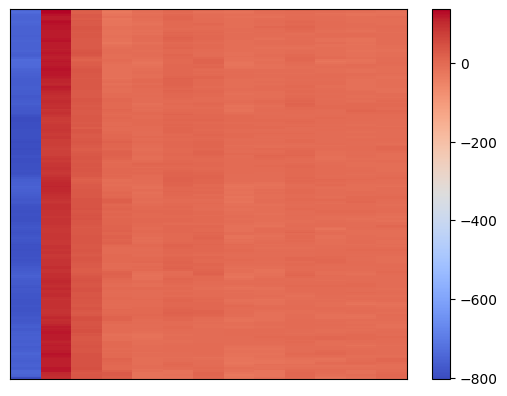

In [17]:
librosa.display.specshow(ac_mfcc)
plt.colorbar()

In [18]:
ac_mel = librosa.feature.inverse.mfcc_to_mel(mfcc=ac_mfcc.T, n_mels=13, dct_type=2, norm='ortho', lifter=100)

In [19]:
ac_mel.shape

(13, 216)

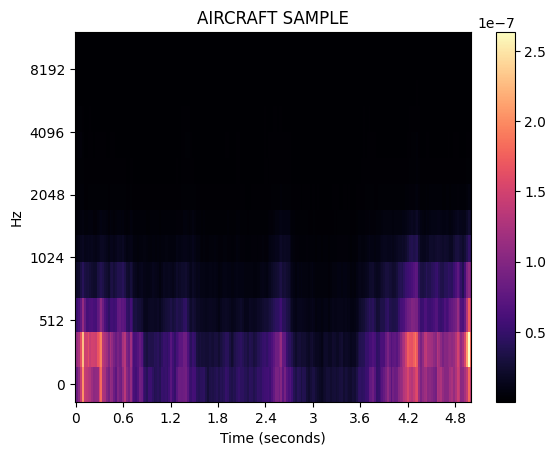

In [20]:
librosa.display.specshow(ac_mel, y_axis='mel', x_axis='s')
plt.colorbar()
plt.title('AIRCRAFT SAMPLE')
plt.show()

In [21]:
y[502]

0

In [22]:
sil_mfcc = X[502]

In [23]:
sil_mfcc.shape

(216, 13)

In [24]:
sil_mfcc[0]

array([-9.33672180e+02, -5.42008018e+00,  7.24822426e+00,  4.52635574e+00,
        2.07873273e+00,  9.52529252e-01,  2.10914302e+00, -5.62928200e+00,
       -8.52663898e+00, -2.30835986e+00, -1.17736757e+00, -5.86006641e-01,
       -4.75286722e-01])

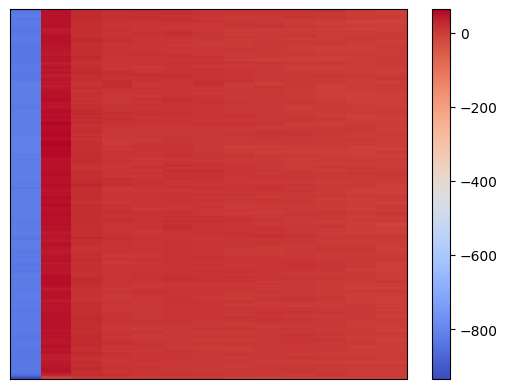

In [25]:
librosa.display.specshow(sil_mfcc)
plt.colorbar()

In [26]:
sil_mel = librosa.feature.inverse.mfcc_to_mel(mfcc=sil_mfcc.T, n_mels=13, dct_type=2, norm='ortho', lifter=100)

In [27]:
sil_mel.shape

(13, 216)

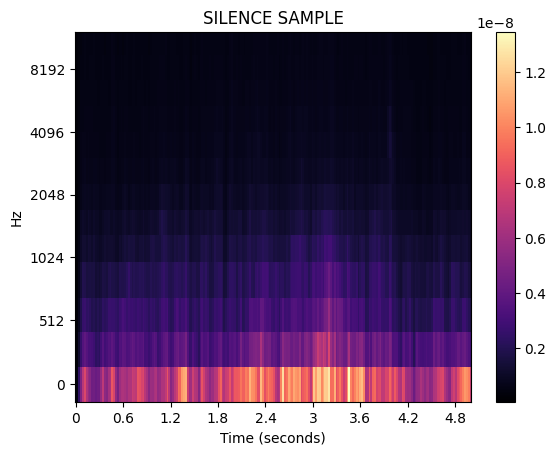

In [28]:
librosa.display.specshow(sil_mel, y_axis='mel', x_axis='s')
plt.colorbar()
plt.title('SILENCE SAMPLE')
plt.show()